In [28]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [30]:
date = pd.read_csv(r"D:\C7 Input Files\dataset\dim_date.csv")
district = pd.read_csv(r"D:\C7 Input Files\dataset\dim_districts.csv")
lpass = pd.read_csv(r"D:\C7 Input Files\dataset\fact_TS_iPASS.csv")

In [31]:
date['month'] = pd.to_datetime(date['month'])
date['fiscal_year'] = pd.to_datetime(date['fiscal_year'].astype(str) + '-04-01')

In [32]:
lpass

,dist_code,month,sector,investment in cr,number_of_employees
0,14_1,01-04-2019,Engineering,2.3200,15
1,19_1,01-04-2019,Engineering,0.6250,13
2,20_3,01-04-2019,Wood and Leather,0.2000,8
3,20_3,01-04-2019,Textiles,0.2675,27
4,21_5,01-04-2019,Electrical and Electronic Products,0.1200,5
...,...,...,...,...,...
5748,20_4,01-03-2023,Engineering,0.1200,3
5749,20_4,01-03-2023,Food Processing,0.7509,9
5750,20_4,01-03-2023,Others,7.7500,10
5751,21_1,01-03-2023,Food Processing,0.3200,9


In [33]:
lpass['month'] = pd.to_datetime(lpass['month'])

In [34]:
merged_lpass = pd.merge(district, lpass, on='dist_code', how='outer')
merged_lpass

,dist_code,district,month,sector,investment in cr,number_of_employees
0,19_1,Adilabad,2019-01-04,Engineering,0.6250,13
1,19_1,Adilabad,2019-01-04,"Cement, Cement & Concrete Products, Fly Ash Br...",19.3702,99
2,19_1,Adilabad,2019-01-04,Food Processing,0.0980,7
3,19_1,Adilabad,2019-01-07,Beverages,0.1300,3
4,19_1,Adilabad,2019-01-07,"Cement, Cement & Concrete Products, Fly Ash Br...",0.7300,10
...,...,...,...,...,...,...
5748,23_3,Yadadri Bhuvanagiri,2023-01-03,"Fertlizers Organic and Inorganic,Pesticides,In...",1.2500,24
5749,23_3,Yadadri Bhuvanagiri,2023-01-03,Food Processing,15.4500,24
5750,23_3,Yadadri Bhuvanagiri,2023-01-03,Pharmaceuticals and Chemicals,1.2800,18
5751,23_3,Yadadri Bhuvanagiri,2023-01-03,Plastic and Rubber,0.4500,9


In [35]:
merged_lpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5753 entries, 0 to 5752
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dist_code            5753 non-null   object        
 1   district             5753 non-null   object        
 2   month                5753 non-null   datetime64[ns]
 3   sector               5753 non-null   object        
 4   investment in cr     5753 non-null   float64       
 5   number_of_employees  5753 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 269.8+ KB


In [36]:
merged_lpass['sector'].value_counts()

sector
Food Processing                                                                1065
Engineering                                                                     692
Cement, Cement & Concrete Products, Fly Ash Bricks                              659
Agro based incl Cold Storages                                                   579
Granite and Stone Crushing                                                      432
Pharmaceuticals and Chemicals                                                   353
Plastic and Rubber                                                              328
Others                                                                          301
Beverages                                                                       274
Wood and Leather                                                                233
Textiles                                                                        209
Paper and Printing                                                   

In [37]:
# Group data by sector and calculate total investment
top_sectors = merged_lpass.groupby('sector')['investment in cr'].sum()

In [38]:
top_sectors

sector
Agro based incl Cold Storages                                                   2100.4685
Automobile                                                                      1575.2121
Beverages                                                                       2809.7994
Cement, Cement & Concrete Products, Fly Ash Bricks                              2238.6345
Electrical and Electronic Products                                               941.6272
Engineering                                                                     5024.6131
Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related     5418.3977
Food Processing                                                                 4115.9122
Granite and Stone Crushing                                                      1922.3752
Industrial Parks and IT Buildings                                                280.4090
Others                                                                          3229.4807
Pap

In [39]:
# Sort sectors based on total investment in descending order
top_sectors = top_sectors.sort_values(ascending=False)

# Display the top sectors by investment
print("Top Sectors by Investment:")
print(top_sectors.head())

Top Sectors by Investment:
sector
Real Estate,Industrial Parks and IT Buildings                                  29778.1741
Pharmaceuticals and Chemicals                                                  15858.0561
Plastic and Rubber                                                              9649.7846
Solar and Other Renewable Energy                                                5639.7032
Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related     5418.3977
Name: investment in cr, dtype: float64


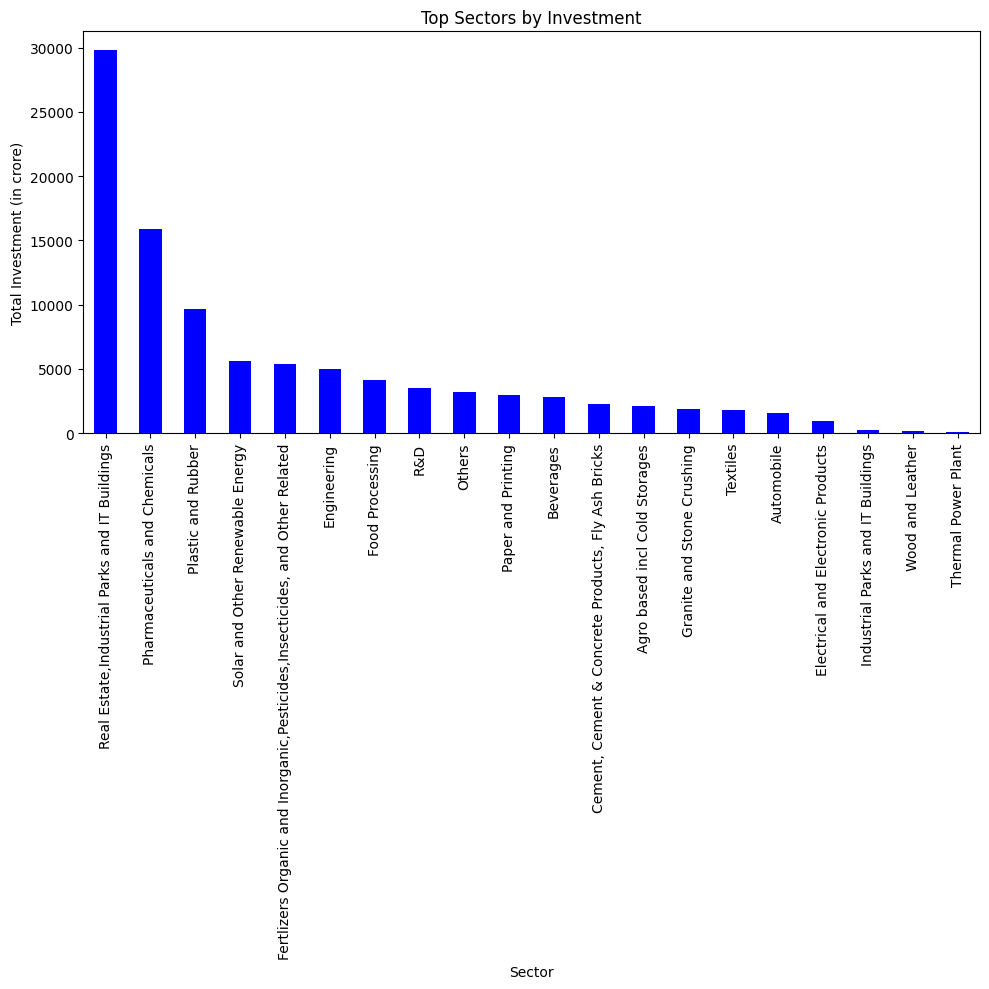

In [40]:
# Create a bar chart
plt.figure(figsize=(10, 10))
top_sectors.plot(kind='bar', color='blue')
plt.title('Top Sectors by Investment')
plt.xlabel('Sector')
plt.ylabel('Total Investment (in crore)')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the bar chart
plt.show()

In [41]:
# Group data by sector and calculate total investment and number of employees
sector_distribution = merged_lpass.groupby('sector')[['investment in cr', 'number_of_employees']].sum()

In [42]:
sector_distribution.sort_values(by = "investment in cr",ascending=False)

,investment in cr,number_of_employees
sector,,
"Real Estate,Industrial Parks and IT Buildings",29778.1741,352558
Pharmaceuticals and Chemicals,15858.0561,73841
Plastic and Rubber,9649.7846,23301
Solar and Other Renewable Energy,5639.7032,3926
"Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related",5418.3977,2325
Engineering,5024.6131,43093
Food Processing,4115.9122,40548
R&D,3520.9069,20146
Others,3229.4807,17646


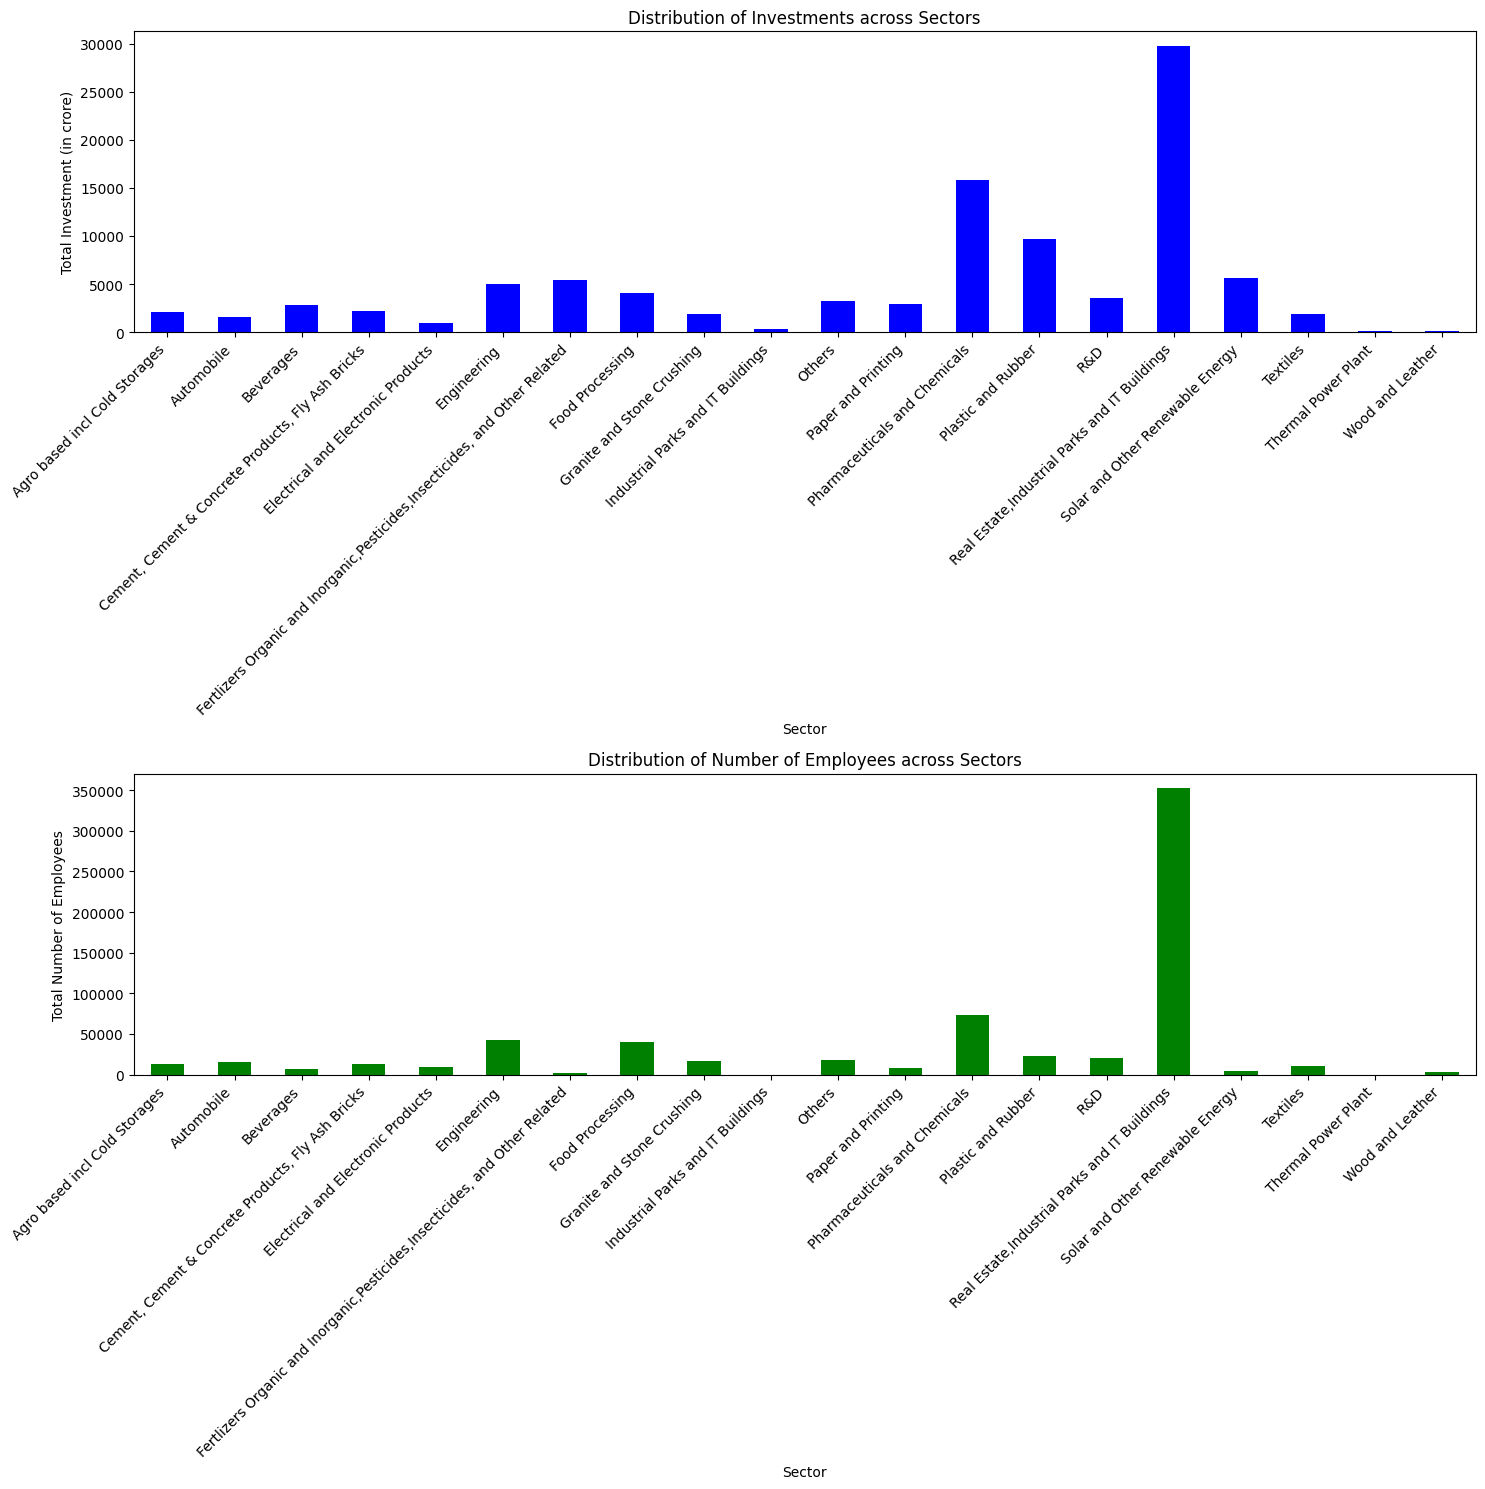

In [43]:
# Create subplots for two bar charts
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# Plot the distribution of investments
sector_distribution['investment in cr'].plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Distribution of Investments across Sectors')
axes[0].set_ylabel('Total Investment (in crore)')
axes[0].set_xlabel('Sector')
axes[0].set_xticklabels(sector_distribution.index, rotation=45, ha='right')

# Plot the distribution of number of employees
sector_distribution['number_of_employees'].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Distribution of Number of Employees across Sectors')
axes[1].set_ylabel('Total Number of Employees')
axes[1].set_xlabel('Sector')
axes[1].set_xticklabels(sector_distribution.index, rotation=45, ha='right')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [44]:
# Group data by month or quarter and calculate total investment
investment_trends = merged_lpass.groupby('month')['investment in cr'].sum()

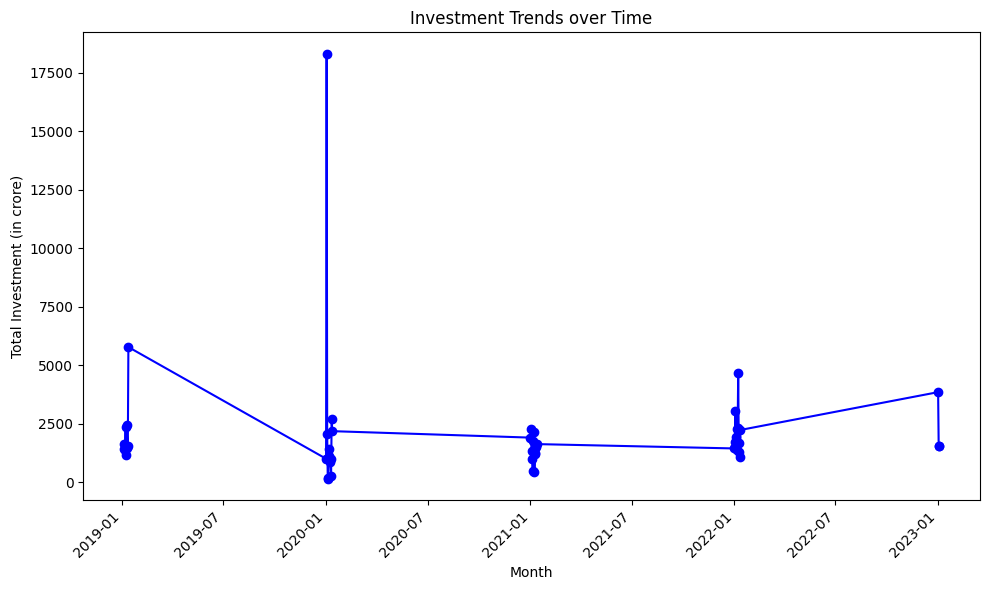

In [45]:
# Create a line chart for investment trends
plt.figure(figsize=(10, 6))
investment_trends.plot(kind='line', marker='o', color='blue')
plt.title('Investment Trends over Time')
plt.xlabel('Month')
plt.ylabel('Total Investment (in crore)')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the line chart
plt.show()

In [46]:
# Group data by month or quarter and calculate total number of employees
employment_trends = merged_lpass.groupby('month')['number_of_employees'].sum()

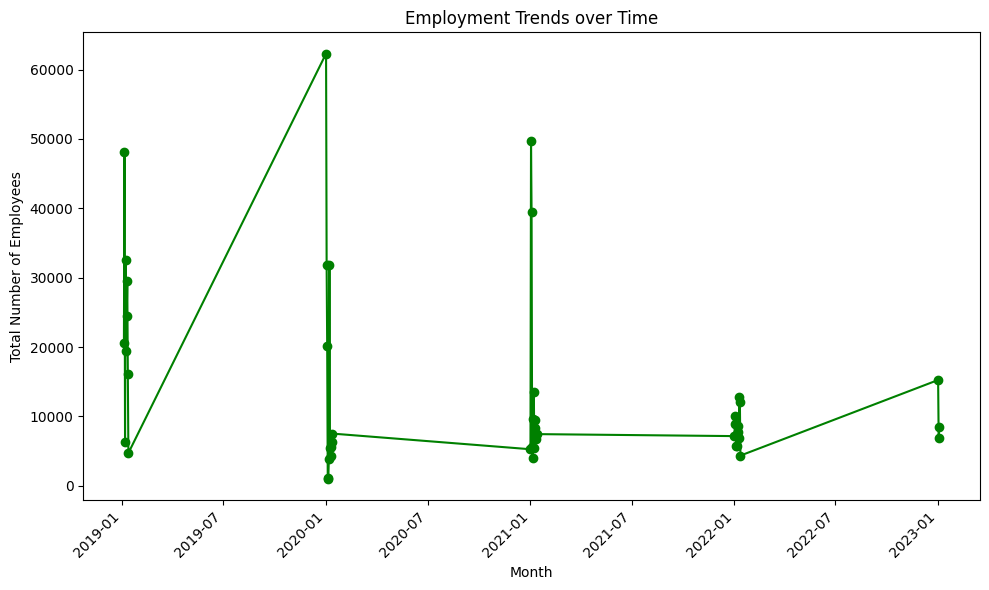

In [47]:
# Create a line chart for employment trends
plt.figure(figsize=(10, 6))
employment_trends.plot(kind='line', marker='o', color='green')
plt.title('Employment Trends over Time')
plt.xlabel('Month')
plt.ylabel('Total Number of Employees')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the line chart
plt.show()

In [48]:
df_sorted = merged_lpass.sort_values(by=['sector', 'month'])

# Calculate the percentage change in investment and number of employees
df_sorted['investment_growth'] = df_sorted.groupby('sector')['investment in cr'].pct_change() * 100
df_sorted['employees_growth'] = df_sorted.groupby('sector')['number_of_employees'].pct_change() * 100

# Drop rows with NaN values (first month for each sector)
df_growth = df_sorted.dropna()

# Display the sectors with their investment and employees growth rates
print(df_growth[['sector', 'investment_growth', 'employees_growth']])

                             sector  investment_growth  employees_growth
348   Agro based incl Cold Storages           3.030303         50.000000
786   Agro based incl Cold Storages         898.941176         50.000000
966   Agro based incl Cold Storages         -13.143328        488.888889
1261  Agro based incl Cold Storages         -61.355932        -67.924528
1531  Agro based incl Cold Storages         -91.228070        -70.588235
...                             ...                ...               ...
4700               Wood and Leather        6567.142857       4000.000000
316                Wood and Leather         -95.714592        -98.780488
573                Wood and Leather           0.000000        500.000000
1788               Wood and Leather         -55.000000        -66.666667
1965               Wood and Leather         655.111111        450.000000

[5730 rows x 3 columns]


In [49]:
# Calculate dominant sector based on highest investment
dominant_investment = merged_lpass.loc[merged_lpass.groupby('district')['investment in cr'].idxmax()]


In [50]:
dominant_investment[['district', 'sector']]

,district,sector
1,Adilabad,"Cement, Cement & Concrete Products, Fly Ash Br..."
121,Bhadradri Kothagudem,Paper and Printing
279,Hanumakonda,Solar and Other Renewable Energy
342,Hyderabad,Engineering
350,Jagtial,Food Processing
695,Jangoan,Food Processing
749,Jayashankar Bhupalpally,Food Processing
827,Jogulamba Gadwal,Solar and Other Renewable Energy
886,Kamareddy,Solar and Other Renewable Energy
1117,Karimnagar,Granite and Stone Crushing


In [ ]:
# District-wise analysis
top_investment_districts = merged_lpass.nlargest(3, 'investment in cr')
bottom_investment_districts = merged_lpass.nsmallest(3, 'investment in cr')

In [ ]:
top_investment_districts

,dist_code,district,month,sector,investment in cr,number_of_employees,investment_growth,employee_growth
3942,15_1,Rangareddy,2020-01-02,"Real Estate,Industrial Parks and IT Buildings",17793.3508,25419,4416.078883,-55.405263
3531,20_4,Peddapalli,2019-01-12,"Fertlizers Organic and Inorganic,Pesticides,In...",5254.2800,450,456793.913043,800.000000
4151,15_1,Rangareddy,2022-01-03,"Real Estate,Industrial Parks and IT Buildings",1862.7300,144,1129.070443,380.000000


In [ ]:
bottom_investment_districts

,dist_code,district,month,sector,investment in cr,number_of_employees,investment_growth,employee_growth
1537,19_4,Kumurambheem Asifabad,2019-01-10,Granite and Stone Crushing,0.0,8,-100.0,-60.000000
1794,14_1,Mahabubnagar,2019-01-05,Granite and Stone Crushing,0.0,1000,-100.0,6566.666667
1801,14_1,Mahabubnagar,2019-01-07,Agro based incl Cold Storages,0.0,10,-100.0,-33.333333


In [ ]:
# Filter data for FY 2022
start_date = pd.Timestamp('2022-04-01')
end_date = pd.Timestamp('2023-03-31')

df_fy2022 = merged_lpass[(merged_lpass['month'] >= start_date) & (merged_lpass['month'] <= end_date)]


In [ ]:
# Calculate total investment by sector in FY 2022
investment_by_sector = df_fy2022.groupby('sector')['investment in cr'].sum()
investment_by_sector

sector
Agro based incl Cold Storages                                                   262.6350
Automobile                                                                     1261.5390
Beverages                                                                        87.6680
Cement, Cement & Concrete Products, Fly Ash Bricks                               97.8931
Electrical and Electronic Products                                              237.2891
Engineering                                                                     731.7274
Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related       8.9077
Food Processing                                                                 494.0120
Granite and Stone Crushing                                                       21.2230
Industrial Parks and IT Buildings                                               280.4090
Others                                                                          430.5006
Paper and Prin

In [ ]:
# List the top 5 sectors with the highest investments
top_sectors = investment_by_sector.nlargest(5)

print("Top 5 Sectors with Highest Investments in FY 2022:")
top_sectors

Top 5 Sectors with Highest Investments in FY 2022:


sector
Plastic and Rubber               2261.0305
Automobile                       1261.5390
Engineering                       731.7274
Food Processing                   494.0120
Pharmaceuticals and Chemicals     432.4375
Name: investment in cr, dtype: float64

In [ ]:
# Filter data for FY 2019 to 2022
start_date = pd.Timestamp('2019-04-01')
end_date = pd.Timestamp('2022-03-31')

df_fy19_22 = merged_lpass[(merged_lpass['month'] >= start_date) & (merged_lpass['month'] <= end_date)]

In [ ]:
# Calculate total sector investments by district
total_investments_by_district = df_fy19_22.groupby('district')['investment in cr'].sum()

# List the top 3 districts with the highest total sector investments
top_districts = total_investments_by_district.nlargest(3)

print("Top 3 Districts with Highest Sector Investments (FY 2019 to 2022):")
print(top_districts)

Top 3 Districts with Highest Sector Investments (FY 2019 to 2022):
district
Rangareddy            35358.5924
Medchal_Malkajgiri     7887.8865
Sangareddy             7759.4801
Name: investment in cr, dtype: float64


In [ ]:
# Filter data for FY 2021 and FY 2022
start_date_2021 = pd.Timestamp('2021-04-01')
end_date_2021 = pd.Timestamp('2022-03-31')
start_date_2022 = pd.Timestamp('2022-04-01')
end_date_2022 = pd.Timestamp('2023-03-31')

df_fy2021 = merged_lpass[(merged_lpass['month'] >= start_date_2021) & (merged_lpass['month'] <= end_date_2021)]
df_fy2022 = merged_lpass[(merged_lpass['month'] >= start_date_2022) & (merged_lpass['month'] <= end_date_2022)]

In [ ]:
# Group data by sector and district for FY 2021 and FY 2022
grouped_2021 = df_fy2021.groupby(['sector', 'district'], as_index=False)['investment in cr'].sum()
grouped_2022 = df_fy2022.groupby(['sector', 'district'], as_index=False)['investment in cr'].sum()

In [ ]:
# Merge the two DataFrames on sector and district
merged = pd.merge(grouped_2021, grouped_2022, on=['sector', 'district'], suffixes=('_2021', '_2022'))

In [ ]:
# Calculate investment growth rate for each sector in each district
merged['investment_growth'] = ((merged['investment in cr_2022'] - merged['investment in cr_2021']) / merged['investment in cr_2021']) * 100

In [ ]:
# Exclude the "Other" sector
merged = merged[merged['sector'] != 'Other']

In [ ]:
# Filter sectors with substantial investment growth in multiple districts
substantial_investment_sectors = merged[merged['investment_growth'] > 0].groupby('sector')['district'].nunique()

In [ ]:
# Print sectors with substantial investment in multiple districts
print("Sectors with Substantial Investment Growth in Multiple Districts:")
print(substantial_investment_sectors[substantial_investment_sectors > 1].sort_values(ascending=False))

Sectors with Substantial Investment Growth in Multiple Districts:
sector
Others                                                6
Beverages                                             5
Engineering                                           4
Agro based incl Cold Storages                         3
Pharmaceuticals and Chemicals                         3
Plastic and Rubber                                    3
R&D                                                   3
Automobile                                            2
Cement, Cement & Concrete Products, Fly Ash Bricks    2
Food Processing                                       2
Name: district, dtype: int64


In [ ]:
# Filter data for the relevant period
start_date = pd.Timestamp('2019-04-01')
end_date = pd.Timestamp('2022-03-31')

df_filtered = merged_lpass[(merged_lpass['month'] >= start_date) & (merged_lpass['month'] <= end_date)]

# Group data by sector and month
grouped = df_filtered.groupby(['sector', 'month'], as_index=False)['investment in cr'].sum()

# Pivot the data for visualization
pivot_table = grouped.pivot(index='month', columns='sector', values='investment in cr')


In [54]:
start_date = pd.Timestamp('2019-04-01')
end_date = pd.Timestamp('2023-03-31')
df_filtered = merged_lpass[(merged_lpass['month'] >= start_date) & (merged_lpass['month'] <= end_date)]
# Group data by sector and month
grouped = df_filtered.groupby(['sector', 'month'], as_index=False)['investment in cr'].sum()

In [55]:
# Create a line chart using Plotly
fig = px.line(grouped, x='month', y='investment in cr', color='sector',
              title='Investment Trends by Sector',
              labels={'month': 'Month', 'investment in cr': 'Total Investment (in crores)'})

# Customize the appearance of the plot
fig.update_layout(legend_title_text='Sector')
fig.update_xaxes(tickangle=45)

# Show the plot
fig.show()

In [56]:
#To find the relationship between investment, vehicle sales and stamp revenue,
stamps = pd.read_csv(r"D:\C7 Input Files\dataset\fact_stamps.csv")

In [60]:
stamps['month'] = pd.to_datetime(stamps['month'],format='%Y-%m-%d')

In [63]:
merged_stamp = pd.merge(district, stamps, on='dist_code', how='outer')

In [61]:
# Filter data for FY 2021 and FY 2022
start_date = pd.Timestamp('2021-04-01')
end_date = pd.Timestamp('2022-03-31')

In [64]:
df_investments_filtered = merged_lpass[(merged_lpass['month'] >= start_date) & (merged_lpass['month'] <= end_date)]
df_stamps_revenue_filtered = merged_stamp[(merged_stamp['month'] >= start_date) & (merged_stamp['month'] <= end_date)]

In [67]:
# Merge dataframes based on district and month
merged_data = pd.merge(df_investments_filtered, df_stamps_revenue_filtered, on=['district', 'month'])

In [69]:
# Calculate correlation matrix
correlation_matrix = merged_data[['investment in cr', 'estamps_challans_rev']].corr()

In [70]:
correlation_matrix

,investment in cr,estamps_challans_rev
investment in cr,1.000000,-0.032878
estamps_challans_rev,-0.032878,1.000000


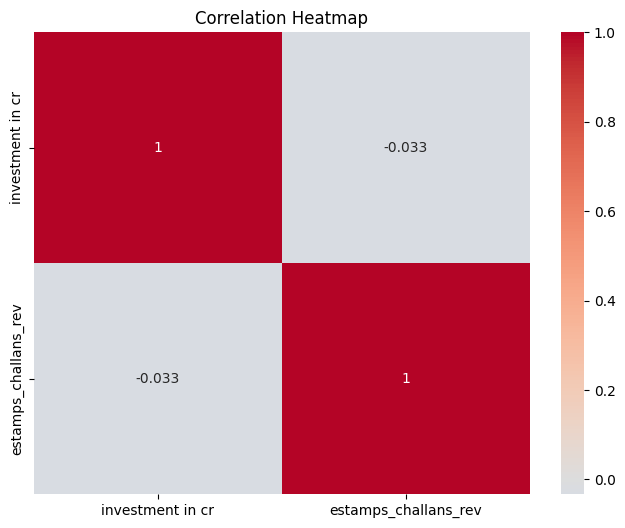

In [72]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

There is no relation between investment and challan revenue.